In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("data/WFH_WFO_dataset.csv")
data.head()

,ID,Name,Age,Occupation,Gender,Same_office_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
0,1,Bhavana,45,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,5,1,5,Yes,5,5,Yes,1
1,2,Harry,24,Tutor,Male,No,No,No,No,No,CALMER,2,2,2,No,3,3,No,1
2,3,Banditaa,53,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,3,3,4,No,5,3,No,1
3,4,Neetha,26,Engineer,Female,Yes,No,Yes,Yes,No,STRESSED,3,4,4,No,4,5,Yes,0
4,5,Ram,26,Recruiter,Male,Yes,No,No,Yes,No,STRESSED,3,3,5,Yes,4,2,Yes,1


In [3]:
# Check for null values

data.isnull().sum()

ID                             0
Name                           0
Age                            0
Occupation                     0
Gender                         0
Same_office_home_location      0
kids                           0
RM_save_money                  0
RM_quality_time                0
RM_better_sleep                0
calmer_stressed                0
RM_professional_growth         0
RM_lazy                        0
RM_productive                  0
digital_connect_sufficient     0
RM_better_work_life_balance    0
RM_improved_skillset           0
RM_job_opportunities           0
Target                         0
dtype: int64

## Pre-processing

In [4]:
data2 = data.copy()

In [5]:
# Bin ages

data2['Age_group'] = pd.cut(x=data2['Age'], bins=[20, 29, 39, 49, 59], labels=["20s", "30s", "40s", "50s"])
age_group_dummies = pd.get_dummies(data2.Age_group)
data2 = pd.concat([data2, age_group_dummies], axis=1)
data2.drop(["Age", "Age_group"], axis=1, inplace=True)
data2.head()

,ID,Name,Occupation,Gender,Same_office_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,...,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target,20s,30s,40s,50s
0,1,Bhavana,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,...,5,Yes,5,5,Yes,1,0,0,1,0
1,2,Harry,Tutor,Male,No,No,No,No,No,CALMER,...,2,No,3,3,No,1,1,0,0,0
2,3,Banditaa,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,...,4,No,5,3,No,1,0,0,0,1
3,4,Neetha,Engineer,Female,Yes,No,Yes,Yes,No,STRESSED,...,4,No,4,5,Yes,0,1,0,0,0
4,5,Ram,Recruiter,Male,Yes,No,No,Yes,No,STRESSED,...,5,Yes,4,2,Yes,1,1,0,0,0


In [6]:
# Get dummy values for gender and calmer_stressed columns

gender = pd.get_dummies(data['Gender'], drop_first=True)
calm_stress = pd.get_dummies(data['calmer_stressed'], drop_first=True)
data2 = pd.concat([data2, gender, calm_stress], axis=1)
data2.drop(['Gender', 'calmer_stressed'], axis=1, inplace=True)
data2.head()

,ID,Name,Occupation,Same_office_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,...,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target,20s,30s,40s,50s,Male,STRESSED
0,1,Bhavana,Tutor,Yes,Yes,Yes,Yes,Yes,5,1,...,5,5,Yes,1,0,0,1,0,0,0
1,2,Harry,Tutor,No,No,No,No,No,2,2,...,3,3,No,1,1,0,0,0,1,0
2,3,Banditaa,HR,Yes,Yes,Yes,Yes,Yes,3,3,...,5,3,No,1,0,0,0,1,0,0
3,4,Neetha,Engineer,Yes,No,Yes,Yes,No,3,4,...,4,5,Yes,0,1,0,0,0,0,1
4,5,Ram,Recruiter,Yes,No,No,Yes,No,3,3,...,4,2,Yes,1,1,0,0,0,1,1


In [7]:
# One-hot occupation (only 7 categories so can afford to do so)

occupation_dummies = pd.get_dummies(data2.Occupation)
data2 = pd.concat([data2, occupation_dummies], axis=1)
data2.drop("Occupation", axis=1, inplace=True)
data2.head()

,ID,Name,Same_office_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,RM_productive,...,50s,Male,STRESSED,Business,Engineer,HR,Manager,Marketing,Recruiter,Tutor
0,1,Bhavana,Yes,Yes,Yes,Yes,Yes,5,1,5,...,0,0,0,0,0,0,0,0,0,1
1,2,Harry,No,No,No,No,No,2,2,2,...,0,1,0,0,0,0,0,0,0,1
2,3,Banditaa,Yes,Yes,Yes,Yes,Yes,3,3,4,...,1,0,0,0,0,1,0,0,0,0
3,4,Neetha,Yes,No,Yes,Yes,No,3,4,4,...,0,0,1,0,1,0,0,0,0,0
4,5,Ram,Yes,No,No,Yes,No,3,3,5,...,0,1,1,0,0,0,0,0,1,0


In [8]:
# Map Yes to 1 and No to 0

categorical =  ['Same_office_home_location', 'kids', 'RM_save_money', 'RM_quality_time', 'RM_better_sleep', 'digital_connect_sufficient','RM_job_opportunities']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

data2[categorical] = data2[categorical].apply(binary_map)
data2.head()

,ID,Name,Same_office_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,RM_productive,...,50s,Male,STRESSED,Business,Engineer,HR,Manager,Marketing,Recruiter,Tutor
0,1,Bhavana,1.0,1,1,1,1,5,1,5,...,0,0,0,0,0,0,0,0,0,1
1,2,Harry,0.0,0,0,0,0,2,2,2,...,0,1,0,0,0,0,0,0,0,1
2,3,Banditaa,1.0,1,1,1,1,3,3,4,...,1,0,0,0,0,1,0,0,0,0
3,4,Neetha,1.0,0,1,1,0,3,4,4,...,0,0,1,0,1,0,0,0,0,0
4,5,Ram,1.0,0,0,1,0,3,3,5,...,0,1,1,0,0,0,0,0,1,0


In [9]:
# Convert Same_office_home_location and RM_job_opportunities columns to integers

data2 = data2.dropna(subset=['Same_office_home_location','RM_job_opportunities'])
data2['Same_office_home_location'] = data2['Same_office_home_location'].astype(int)
data2['RM_job_opportunities'] = data2['RM_job_opportunities'].astype(int)
data2.head()

,ID,Name,Same_office_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,RM_productive,...,50s,Male,STRESSED,Business,Engineer,HR,Manager,Marketing,Recruiter,Tutor
0,1,Bhavana,1,1,1,1,1,5,1,5,...,0,0,0,0,0,0,0,0,0,1
1,2,Harry,0,0,0,0,0,2,2,2,...,0,1,0,0,0,0,0,0,0,1
2,3,Banditaa,1,1,1,1,1,3,3,4,...,1,0,0,0,0,1,0,0,0,0
3,4,Neetha,1,0,1,1,0,3,4,4,...,0,0,1,0,1,0,0,0,0,0
4,5,Ram,1,0,0,1,0,3,3,5,...,0,1,1,0,0,0,0,0,1,0


In [10]:
# Drop ID and Name and Target

data2.drop(["ID", "Name", "Target"], axis=1, inplace=True)
data2.head()

,Same_office_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,...,50s,Male,STRESSED,Business,Engineer,HR,Manager,Marketing,Recruiter,Tutor
0,1,1,1,1,1,5,1,5,1,5,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,2,2,2,0,3,...,0,1,0,0,0,0,0,0,0,1
2,1,1,1,1,1,3,3,4,0,5,...,1,0,0,0,0,1,0,0,0,0
3,1,0,1,1,0,3,4,4,0,4,...,0,0,1,0,1,0,0,0,0,0
4,1,0,0,1,0,3,3,5,1,4,...,0,1,1,0,0,0,0,0,1,0


## Correlation Analysis

In [11]:
corr = data2.corr()
corr.style.background_gradient(cmap='coolwarm')

,Same_office_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,20s,30s,40s,50s,Male,STRESSED,Business,Engineer,HR,Manager,Marketing,Recruiter,Tutor
Same_office_home_location,1.000000,0.360883,0.255768,0.440250,-0.171160,-0.049485,-0.023342,0.421157,0.014568,0.407827,0.090905,0.107174,-0.345444,0.005498,0.153861,0.332846,-0.228224,0.074541,0.146905,0.085656,-0.212097,-0.131772,0.091994,0.009690,-0.037464
kids,0.360883,1.000000,0.270087,0.147798,-0.033569,0.018631,-0.246371,0.355899,0.387069,0.235065,-0.091031,-0.307026,-0.689900,0.028094,0.510335,0.395004,-0.375129,0.057132,0.108004,-0.238728,-0.047876,-0.079799,0.003917,-0.186174,0.301109
RM_save_money,0.255768,0.270087,1.000000,0.542028,0.279746,0.081378,0.146566,0.560350,0.260102,0.337081,0.356321,0.108813,-0.132135,-0.065037,0.027420,0.197693,-0.522607,-0.221816,0.171008,-0.008689,0.065586,0.003268,-0.104082,-0.114624,-0.067794
RM_quality_time,0.440250,0.147798,0.542028,1.000000,0.342720,-0.360009,0.001867,0.286387,-0.046829,0.691966,0.187471,0.110133,-0.303495,0.089551,0.163244,0.218592,-0.197576,-0.279553,0.209503,0.033375,-0.011409,-0.154792,-0.228634,0.157829,-0.016274
RM_better_sleep,-0.171160,-0.033569,0.279746,0.342720,1.000000,0.092827,-0.033348,0.090723,0.089009,0.324430,0.005117,-0.328307,-0.217687,0.025756,-0.048890,0.388144,0.157816,-0.683161,0.099013,-0.111013,0.203838,0.033298,-0.157433,0.045393,-0.077332
RM_professional_growth,-0.049485,0.018631,0.081378,-0.360009,0.092827,1.000000,0.239432,0.248491,0.044696,-0.228146,-0.235459,-0.159020,0.048440,-0.064104,-0.200655,0.212626,0.008677,-0.100737,-0.025941,0.034130,-0.064028,0.212626,0.180324,-0.011892,-0.239206
RM_lazy,-0.023342,-0.246371,0.146566,0.001867,-0.033348,0.239432,1.000000,-0.136281,-0.137510,-0.036621,-0.102175,0.166925,0.393305,-0.099287,-0.618262,0.234344,0.171078,-0.002549,0.392536,0.137417,-0.038803,0.019829,0.085996,0.014317,-0.559744
RM_productive,0.421157,0.355899,0.560350,0.286387,0.090723,0.248491,-0.136281,1.000000,0.237100,0.230181,0.095884,0.008381,-0.283188,-0.031475,0.270509,0.102439,-0.442504,0.000000,-0.121001,-0.074293,-0.190980,0.102439,0.036571,0.117109,0.173888
digital_connect_sufficient,0.014568,0.387069,0.260102,-0.046829,0.089009,0.044696,-0.137510,0.237100,1.000000,-0.073730,0.148947,0.075378,-0.195077,-0.018871,0.116775,0.159131,-0.072798,0.106600,0.181369,-0.267261,-0.029235,0.100504,0.021926,0.044346,-0.017376
RM_better_work_life_balance,0.407827,0.235065,0.337081,0.691966,0.324430,-0.228146,-0.036621,0.230181,-0.073730,1.000000,0.004268,-0.003762,-0.467512,0.026115,0.212377,0.436821,-0.041068,-0.394194,0.198323,-0.036379,0.026530,-0.218886,-0.249710,0.075957,0.131663


## K-Means

In [12]:
SSE = []
Diff = []

for i in range(1, 9):
    model_i = KMeans(n_clusters=i, random_state=100)
    model_i.fit(data2)
    SSE.append(model_i.inertia_)

for j in range(len(SSE)):
    if j > 0:
        Diff.append(-(SSE[j] - SSE[j-1]))
        
# Diff.index(max(Diff))

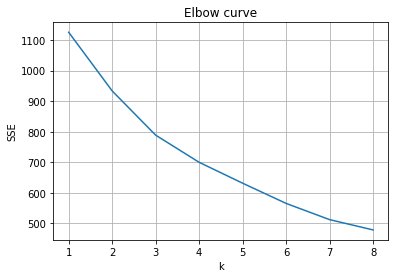

In [13]:
k = (range(1,9))
plt.title('Elbow curve')
plt.xlabel('k')
plt.ylabel('SSE')
plt.grid(True)
plt.plot(k, SSE)
plt.show()

In [14]:
# Best K value = 3

km = KMeans(n_clusters = 3, random_state = 100)
km.fit(data2)

KMeans(n_clusters=3, random_state=100)

In [15]:
data2["cluster"] = km.labels_
data2.head()

,Same_office_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,...,Male,STRESSED,Business,Engineer,HR,Manager,Marketing,Recruiter,Tutor,cluster
0,1,1,1,1,1,5,1,5,1,5,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,2,2,2,0,3,...,1,0,0,0,0,0,0,0,1,2
2,1,1,1,1,1,3,3,4,0,5,...,0,0,0,0,1,0,0,0,0,1
3,1,0,1,1,0,3,4,4,0,4,...,0,1,0,1,0,0,0,0,0,1
4,1,0,0,1,0,3,3,5,1,4,...,1,1,0,0,0,0,0,1,0,1


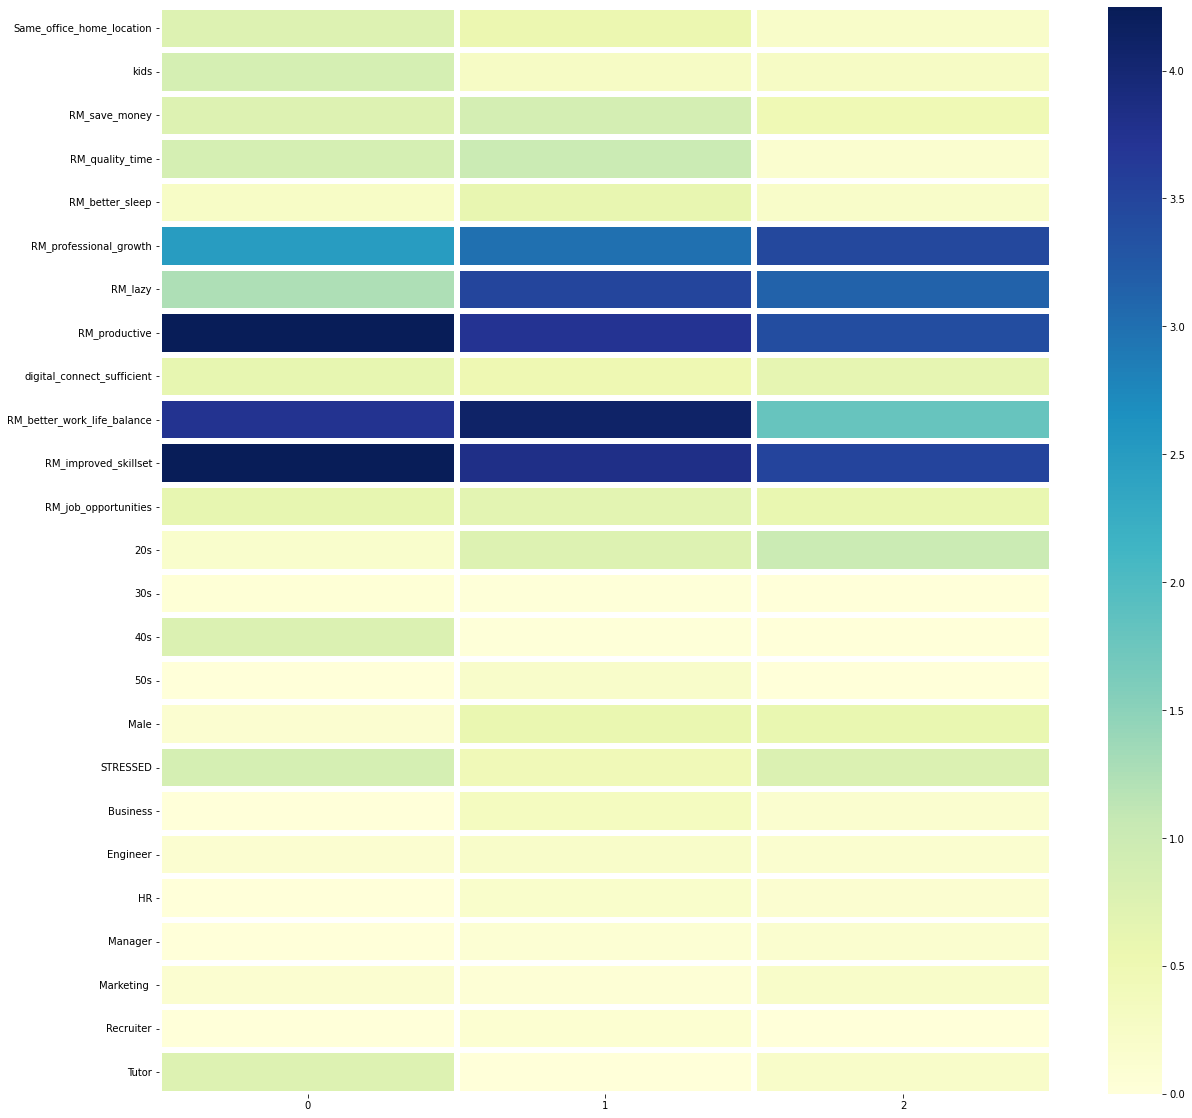

In [16]:
clust_means = pd.DataFrame(km.cluster_centers_, columns=data2.columns[:-1])
fig = plt.figure(figsize=(20, 20))
sns.heatmap(clust_means.T, linewidths=5, cmap="YlGnBu")
plt.show()